In [11]:
!pip install mnist

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import mnist

In [13]:
from tensorflow.examples.tutorials import mnist

mnist_data = mnist.input_data.read_data_sets('/tmp')
train_data = mnist_data.train
test_data = mnist_data.test

Extracting /tmp/train-images-idx3-ubyte.gz
Extracting /tmp/train-labels-idx1-ubyte.gz
Extracting /tmp/t10k-images-idx3-ubyte.gz
Extracting /tmp/t10k-labels-idx1-ubyte.gz


In [14]:
train_data.images.shape

(55000, 784)

In [15]:
test_data.images.shape

(10000, 784)

In [9]:
type(train_data.labels)

numpy.ndarray

In [17]:

# images = mnist.train_images()
# labels = mnist.train_labels()

images = train_data.images
labels = train_data.labels
test_images = test_data.images
test_labeks = test_data.labels

# test_images = mnist.test_images()
# test_labels = mnist.test_labels()
images = images.reshape(55000,28,28,1)
from tensorflow.keras.layers import Dense, Dropout, Flatten
input_shape=(28,28,1)
num_classes = 10
model = keras.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_train = model.fit(images, labels, epochs=20,validation_split=0.10,batch_size = 200)

Train on 49500 samples, validate on 5500 samples
Epoch 1/20
49500/49500 [==============================] - 13s 264us/step - loss: 0.2022 - acc: 0.9374 - val_loss: 0.0603 - val_acc: 0.9827
Epoch 2/20
49500/49500 [==============================] - 12s 242us/step - loss: 0.0516 - acc: 0.9837 - val_loss: 0.0517 - val_acc: 0.9862
Epoch 3/20
49500/49500 [==============================] - 12s 242us/step - loss: 0.0292 - acc: 0.9907 - val_loss: 0.0535 - val_acc: 0.9864
Epoch 4/20
49500/49500 [==============================] - 12s 242us/step - loss: 0.0199 - acc: 0.9935 - val_loss: 0.0528 - val_acc: 0.9876
Epoch 5/20
49500/49500 [==============================] - 12s 241us/step - loss: 0.0134 - acc: 0.9956 - val_loss: 0.0592 - val_acc: 0.9856
Epoch 6/20
49500/49500 [==============================] - 12s 240us/step - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0605 - val_acc: 0.9878
Epoch 7/20
49500/49500 [==============================] - 12s 240us/step - loss: 0.0080 - acc: 0.9973 - val_loss: 0.0

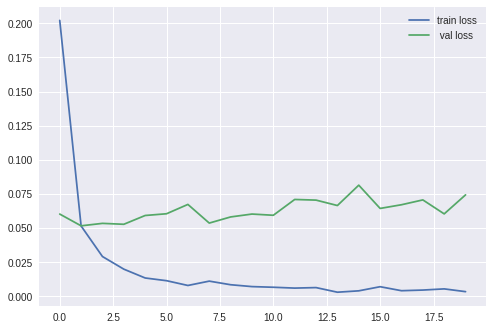

In [18]:
import matplotlib.pyplot as plt
plt.plot(cnn_train.history['loss'],label ="train loss")
plt.plot(cnn_train.history['val_loss'],label =" val loss")
plt.legend()
plt.show()

In [19]:
loss, acc = model.evaluate(test_images.reshape(10000,28,28,1),test_labeks)

10000/10000 [==============================] - 2s 153us/step


In [20]:
print(acc)

0.9817


Using maxpool and 2 filters

In [23]:
input_shape=(28,28,1)
num_classes = 10
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(keras.layers.Conv2D(64, (5, 5), activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model2.summary())
cnn_maxpool_train = model2.fit(images, labels, epochs=20,validation_split=0.10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        204864    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               991360    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
__________

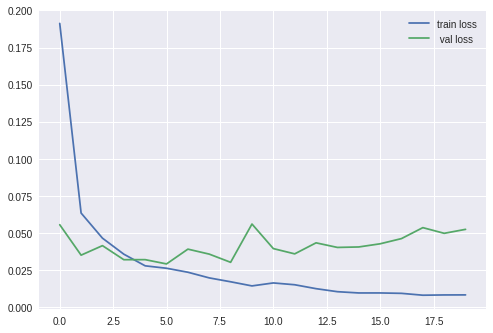

In [24]:
plt.plot(cnn_maxpool_train.history['loss'],label ="train loss")
plt.plot(cnn_maxpool_train.history['val_loss'],label =" val loss")
plt.legend()
plt.show()

In [25]:
loss, acc = model2.evaluate(test_images.reshape(10000,28,28,1),test_labeks)
print(acc)

10000/10000 [==============================] - 2s 159us/step
0.9926
